# Importing Libraries and Datasets

In [1]:
# Dataset link
# https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share
# https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_USA_2.json.zip

In [ ]:
# Import part.

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
from matplotlib.lines import Line2D
import folium

In [ ]:
# Read bike datasets and usa map.

data_station = pd.read_csv("dataset/station.csv")
data_trip = pd.read_csv("dataset/trip.csv")
data_weather = pd.read_csv("dataset/weather.csv")

usa_data_2 = gpd.read_file("dataset/gadm41_USA_2.json.zip")

In [ ]:
# I turned string date infos to datetime objects.

data_station["installation_date"] = pd.to_datetime(data_station["installation_date"])

data_trip["start_date"] = pd.to_datetime(data_trip["start_date"])
data_trip["end_date"] = pd.to_datetime(data_trip["end_date"])

data_weather["date"] = pd.to_datetime(data_weather["date"])

# Data

Introducing the datasets:

In [ ]:
data_trip.tail()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
669954,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,94118
669955,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,44100
669956,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,32
669957,432948,568,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,461,Customer,32
669958,432947,569,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:15:00,5th at Howard,57,318,Customer,32


In [ ]:
print("Number of trips : " + str(data_trip.shape[0]))
print("Range of dates  : " + str(data_trip["start_date"].min())[0:10] + " - "+ str(data_trip["start_date"].max())[0:10])

Number of trips : 669959
Range of dates  : 2013-08-29 - 2015-08-31


- "data_trip" includes bicycle trips picked up from one station and dropped off at another station for 2 years. **The date**, **the ID of the station where the bike was picked up and dropped off** seem to be important.

In [ ]:
data_station.tail()

,id,name,lat,long,dock_count,city,installation_date
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,2013-08-25
66,80,Santa Clara County Civic Center,37.352601,-121.905733,15,San Jose,2013-12-31
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,2014-01-22
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2014-02-20
69,84,Ryland Park,37.342725,-121.895617,15,San Jose,2014-04-09


- Look at the data_station; **station ID and coordinates of station** are important features. There are 70 different stations.

In [ ]:
data_weather.tail()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
3660,2015-08-27,92.0,78.0,63.0,57.0,51.0,40.0,78.0,48.0,18.0,...,10.0,10.0,23.0,6.0,29.0,0,3.0,NaN,313.0,95113
3661,2015-08-28,95.0,80.0,64.0,64.0,56.0,52.0,93.0,60.0,26.0,...,10.0,10.0,25.0,7.0,30.0,0,3.0,NaN,307.0,95113
3662,2015-08-29,80.0,72.0,64.0,65.0,62.0,54.0,93.0,70.0,47.0,...,10.0,10.0,21.0,9.0,26.0,0,4.0,NaN,312.0,95113
3663,2015-08-30,78.0,70.0,62.0,60.0,57.0,53.0,84.0,64.0,43.0,...,10.0,10.0,22.0,10.0,29.0,0,3.0,NaN,291.0,95113
3664,2015-08-31,85.0,72.0,59.0,59.0,55.0,51.0,84.0,58.0,32.0,...,10.0,10.0,20.0,6.0,24.0,0,1.0,NaN,308.0,95113


In [ ]:
# What are events

unique_events = data_weather["events"].unique()
print(unique_events)

[nan 'Fog' 'Rain' 'Fog-Rain' 'rain' 'Rain-Thunderstorm']


- Look at the data_weather; **date, temperature and event** are important.

# Part1

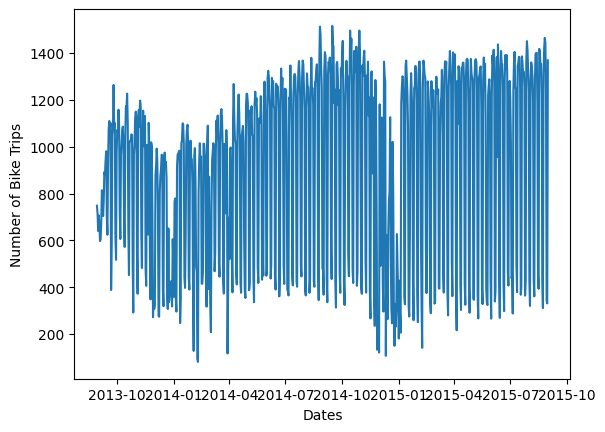

In [ ]:
# Visualize data_trip in terms of number of trips and dates

data_trip["date"] = data_trip["start_date"].dt.date
date = data_trip["date"].value_counts().sort_index()
date.plot()
plt.xlabel("Dates")
plt.ylabel("Number of Bike Trips")
plt.show()

- It is hard to see anything from dates. Make some generalization by changing dates to months.

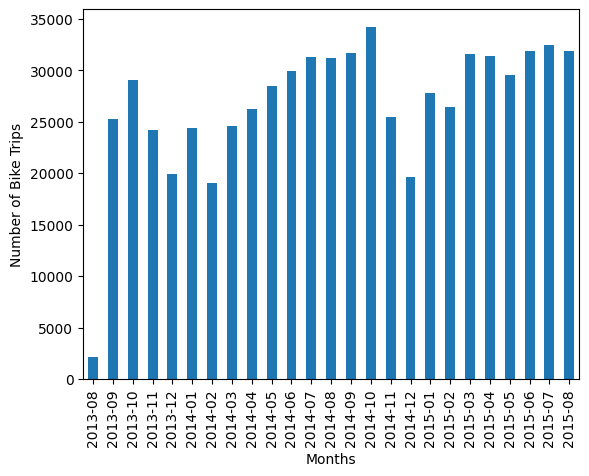

In [ ]:
# Visualize data_trip in terms of number of trips and months

data_trip["month"] = data_trip["start_date"].dt.to_period('M')
month = data_trip["month"].value_counts().sort_index()
month.plot(kind="bar")
plt.xlabel("Months")
plt.ylabel("Number of Bike Trips")
plt.show()

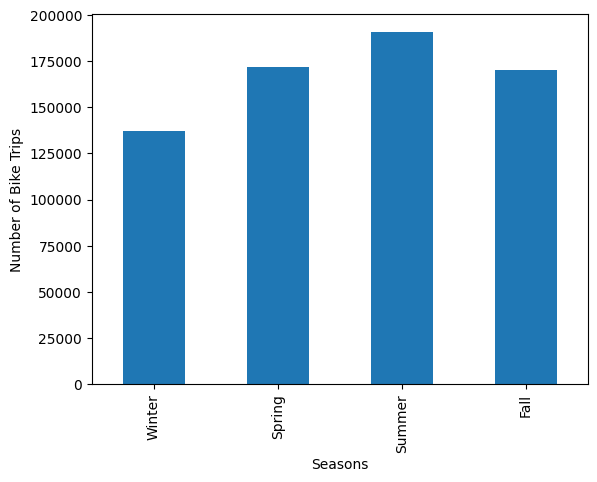

In [ ]:
# Visualize data_trip in terms of number of trips and seasons.

data_trip["season"] = (data_trip["start_date"].dt.month % 12 // 3) +1
season_names = {1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"}
season = data_trip["season"].map(season_names).value_counts().sort_index()
seasons = season[["Winter", "Spring", "Summer", "Fall"]]
seasons.plot(kind="bar")
plt.xlabel("Seasons")
plt.ylabel("Number of Bike Trips")
plt.show()

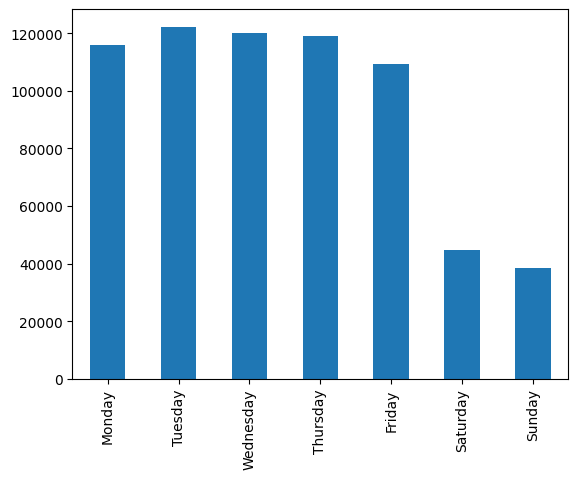

In [ ]:
# Visualize data_trip in terms of number of trips and weekdays/weekends.

data_trip["day_of_week"] = data_trip["start_date"].dt.dayofweek
day_names = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday",
             5: "Saturday", 6: "Sunday"}
day_of_week = data_trip["day_of_week"].map(day_names).value_counts().sort_index()
days_of_week = day_of_week[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
days_of_week.plot(kind="bar")
plt.show()

In [ ]:
# There are 5 weather conditions for the same day because of location differences (zip_code).
# For simplicity, I focus on just one zip code, then filtered the data_weather.

target_zip_code = 94107
data_weather_filtered = data_weather[data_weather["zip_code"] == target_zip_code]

unique_events = data_weather_filtered["events"].unique()

data_trip["date_new"] = data_trip["date"].astype(str)
data_weather_filtered["date_new"] = data_weather_filtered["date"].astype(str)

<ipython-input-14-4f13f4dd4635>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_weather_filtered["date_new"] = data_weather_filtered["date"].astype(str)


In [ ]:
# data_trip has no weather conditions, so merge data_trip and data_weather for important features.

merged_data = pd.merge(data_trip, data_weather_filtered[["date_new", "events"]], on="date_new", how="left")

In [ ]:
# Print number of days which are rainy/foggy/NaN

event_counts_1 = data_weather_filtered['events'].value_counts(dropna=False)
print(event_counts_1)

NaN                  574
Rain                  92
Fog                   54
Fog-Rain              10
Rain-Thunderstorm      2
rain                   1
Name: events, dtype: int64


In [ ]:
# Print number of bike trips which are rainy/foggy/NaN

event_counts_2 = merged_data['events'].value_counts(dropna=False)
print(event_counts_2)

NaN                  540400
Rain                  72910
Fog                   47026
Fog-Rain               7456
Rain-Thunderstorm      1629
rain                    538
Name: events, dtype: int64


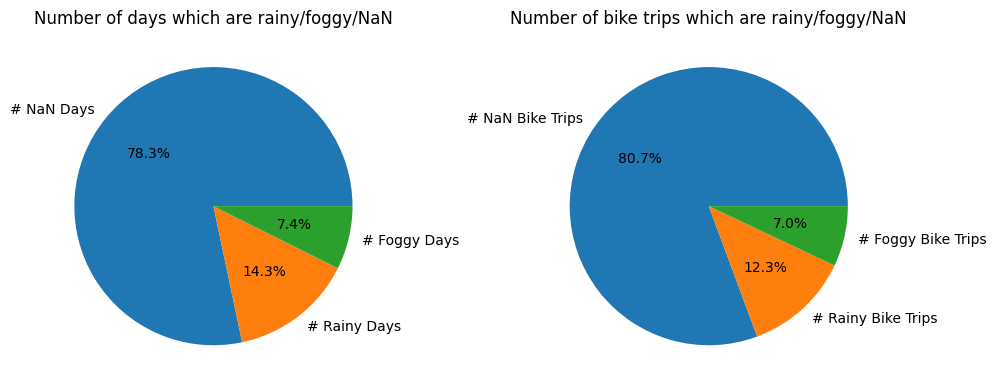

In [ ]:
# Visualization of weather events
# Comparision of number of days and number of bike trips which are rainy/foggy/NaN

labels_1 = "# NaN Days" , "# Rainy Days", "# Foggy Days"
sizes_1 = [event_counts_1[0], event_counts_1[1] + event_counts_1[3] + event_counts_1[4] + event_counts_1[5], event_counts_1[2]]

labels_2 = "# NaN Bike Trips" , "# Rainy Bike Trips", "# Foggy Bike Trips"
sizes_2 = [event_counts_2[0], event_counts_2[1] + event_counts_2[3] + event_counts_2[4] + event_counts_2[5], event_counts_2[2]]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
axs[0].set_title("Number of days which are rainy/foggy/NaN")

axs[1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%')
axs[1].set_title("Number of bike trips which are rainy/foggy/NaN")

plt.tight_layout()
plt.show()

In [ ]:
# Print minimum and maximum temperatures (unit = F)

min_tem = data_weather_filtered["mean_temperature_f"].min()
max_tem = data_weather_filtered["mean_temperature_f"].max()
print("Minimum temperature : " + str(min_tem) +"°F")
print("Maximum temperature : " + str(max_tem) +"°F")

Minimum temperature : 41.0°F
Maximum temperature : 77.0°F


In [ ]:
# data_trip has no temperature features, so merge data_trip and data_weather for important features.
# Then convert it to celcius.

merged_data = pd.merge(data_trip, data_weather_filtered[["date_new", "mean_temperature_f"]], on="date_new", how="left")

In [ ]:
merged_data["mean_temperature_c"] = ( merged_data["mean_temperature_f"] -32 ) *5 /9
data_weather_filtered["mean_temperature_c"] = ( data_weather_filtered["mean_temperature_f"] -32 ) *5 /9

<ipython-input-21-7c4aa6d04b57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_weather_filtered["mean_temperature_c"] = ( data_weather_filtered["mean_temperature_f"] -32 ) *5 /9


In [ ]:
# Print minimum and maximum temperatures (unit = C)

min_tem = merged_data["mean_temperature_c"].min()
max_tem = merged_data["mean_temperature_c"].max()
print("Minimum temperature : " + str(min_tem) +"°C")
print("Maximum temperature : " + str(max_tem) +"°C")

Minimum temperature : 5.0°C
Maximum temperature : 25.0°C


In [ ]:
merged_data["temp"] = ((merged_data["mean_temperature_c"] - 5) // 4).astype(int)
data_weather_filtered["temp"] = ((data_weather_filtered["mean_temperature_c"] - 5) // 4).astype(int)

<ipython-input-23-d6cfba2fd467>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_weather_filtered["temp"] = ((data_weather_filtered["mean_temperature_c"] - 5) // 4).astype(int)


In [ ]:
event_counts_3 = data_weather_filtered["temp"].value_counts(dropna=False)
print(event_counts_3)

2    306
3    234
1    135
4     37
0     19
5      2
Name: temp, dtype: int64


In [ ]:
event_counts_4 = merged_data["temp"].value_counts(dropna=False)
print(event_counts_4)

2    280181
3    233060
1    105055
4     38644
0     11406
5      1613
Name: temp, dtype: int64


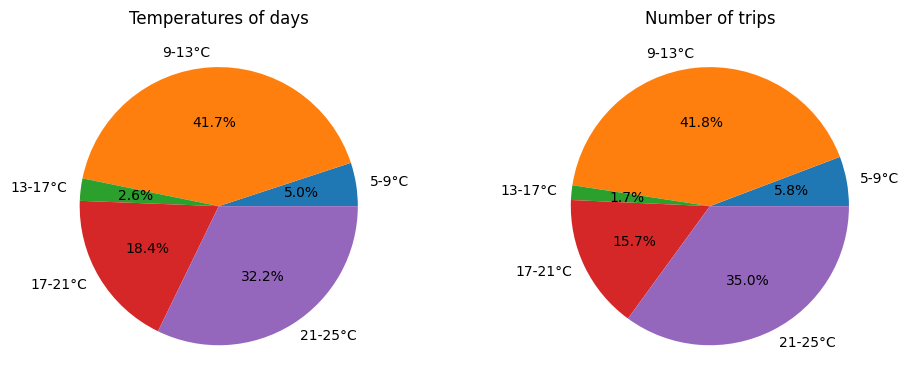

In [ ]:
labels_1 = "5-9°C" , "9-13°C", "13-17°C", "17-21°C", "21-25°C"
sizes_1 = [event_counts_3[4], event_counts_3[2], event_counts_3[0], event_counts_3[1], event_counts_3[3] + event_counts_3[5]]

labels_2 = "5-9°C" , "9-13°C", "13-17°C", "17-21°C", "21-25°C"
sizes_2 = [event_counts_4[4], event_counts_4[2], event_counts_4[0], event_counts_4[1], event_counts_4[3] + event_counts_4[5]]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
axs[0].set_title("Temperatures of days")

axs[1].pie(sizes_2, labels=labels_2, autopct='%1.1f%%')
axs[1].set_title("Number of trips")

plt.tight_layout()
plt.show()

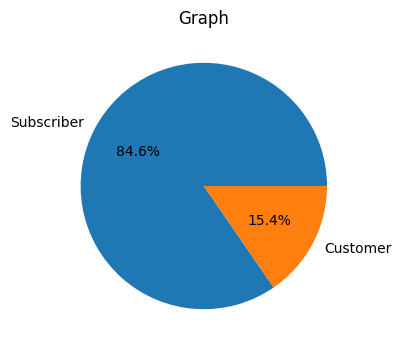

In [ ]:
# Visualization of subscription type

subs_type = merged_data["subscription_type"].value_counts(dropna=False)

labels_1 = "Subscriber", "Customer"
sizes_1 = [subs_type[0], subs_type[1]]

plt.figure(figsize=(4,4))

plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%')
plt.title("Graph")

plt.show()

# Part2

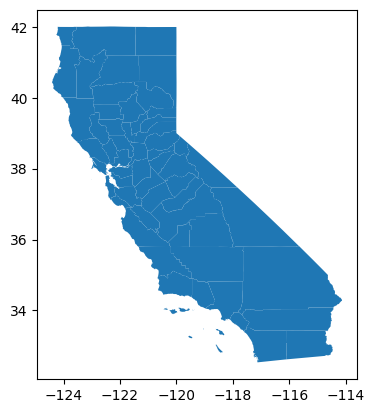

In [ ]:
# Visualization of California
# Data is collected from California

california_map = usa_data_2[usa_data_2["NAME_1"] == "California"]
california_map.plot()
plt.show()

In [ ]:
# Create a new feature to save both longtitude and latitude as a list object

data_station["point"] = data_station.apply(lambda row: [row["long"], row["lat"]], axis=1)

In [ ]:
# data_trip has station_id but no location points.
# Do some merge operations

merged_data = pd.merge(data_trip, data_station[["id", "point"]], left_on="start_station_id", right_on= "id", how="left")
merged_data = pd.merge(merged_data, data_station[["id", "point"]], left_on="end_station_id", right_on= "id", how="left")
merged_data = merged_data.rename(columns={"point_x": "start_point", "point_y": "end_point"})

In [ ]:
# To visualize geospatial data, I picked a month
# Then I focus on this month to visualize it

print("Target month : " + str(merged_data.iloc[-500]["month"]))

Target month : 2014-09


In [ ]:
target_month = pd.Period('2014-09', 'M')
data_trip_filtered = merged_data[merged_data["month"] == target_month]

In [ ]:
print("Number of cycling trips in the target month : " + str(data_trip_filtered.shape[0]))

Number of cycling trips in the target month : 31682


In [ ]:
# When visualizing road line from the start point to the end point, the reverse road line seems the same.
# To simplify, I sorted 2 points. for later steps there is no start point, they are just points.
# And also I don't focus on trips that have the same starting and ending point.

def create_station_id(row):
    start_id = row["start_station_id"]
    end_id = row["end_station_id"]
    if start_id == end_id:
        return None
    else:
        station_ids = sorted([start_id, end_id])
        return station_ids

data_trip_filtered["station_id"] = data_trip_filtered.apply(create_station_id, axis=1)

<ipython-input-34-e4cf2a7fc4b7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trip_filtered["station_id"] = data_trip_filtered.apply(create_station_id, axis=1)


In [ ]:
# Print the series to understand how many combinations there are between any two points
# and what is the number of trips between these two points.
# None says 1052 trips have the same starting and ending point.

trip_counts = data_trip_filtered["station_id"].value_counts(dropna=False)
print(trip_counts)

None        1052
[50, 61]     505
[50, 60]     452
[64, 77]     405
[65, 70]     402
            ... 
[33, 35]       1
[5, 11]        1
[30, 32]       1
[5, 16]        1
[3, 13]        1
Name: station_id, Length: 754, dtype: int64


In [ ]:
# Then I create a new dataset

df = pd.DataFrame(trip_counts)
df["ids"] = df.index
df = df.reset_index(drop=True)
df = df.rename(columns={"station_id": "number_trips"})
df = df.iloc[1:]
df = df.reset_index(drop=True)
df[["id_a", "id_b"]] = pd.DataFrame(df["ids"].tolist())
df.tail()

,number_trips,ids,id_a,id_b
748,1,"[33, 35]",33,35
749,1,"[5, 11]",5,11
750,1,"[30, 32]",30,32
751,1,"[5, 16]",5,16
752,1,"[3, 13]",3,13


In [ ]:
# With merge operations, new dataset gets more features

df = df.merge(data_station[["id", "point"]], how="left", left_on="id_a", right_on="id", suffixes=("", "_a"))
df = df.rename(columns={"point": "point_a"})
del df["id"]

df = df.merge(data_station[["id", "point"]], how="left", left_on="id_b", right_on="id", suffixes=("", "_b"))
df = df.rename(columns={"point": "point_b"})
del df["id"]

In [ ]:
df.tail()

,number_trips,ids,id_a,id_b,point_a,point_b
748,1,"[33, 35]",33,35,"[-122.099076, 37.400241]","[-122.163093, 37.444521]"
749,1,"[5, 11]",5,11,"[-121.8932, 37.331415]","[-121.88566000000002, 37.335885]"
750,1,"[30, 32]",30,32,"[-122.066553, 37.390277000000005]","[-122.083678, 37.385956]"
751,1,"[5, 16]",5,16,"[-121.8932, 37.331415]","[-121.877349, 37.333955]"
752,1,"[3, 13]",3,13,"[-121.888979, 37.330698]","[-121.88993700000002, 37.339301]"


- New dataset which is called "df" have some features. It has number of trips between two specific points on the target month. Also, it has locations of these two points

In [ ]:
# I focus on rows which have more than 10 number of trips.
# Also I categorized them by number of bike trips and assigned colors.

df = df[df["number_trips"] >= 10]

def define_range(x):
    if x < 25:
        return 0
    elif x < 50:
        return 1
    elif x < 100:
        return 2
    elif x < 200:
        return 3
    else:
        return 4

def define_color(x):
    if x < 25:
        return "blue"
    elif x < 50:
        return "green"
    elif x < 100:
        return "yellow"
    elif x < 200:
        return "orange"
    else:
        return "red"

df["range"] = df["number_trips"].apply(define_range)
df["color"] = df["number_trips"].apply(define_color)

In [ ]:
df.tail()

,number_trips,ids,id_a,id_b,point_a,point_b,range,color
520,10,"[3, 16]",3,16,"[-121.888979, 37.330698]","[-121.877349, 37.333955]",0,blue
521,10,"[49, 66]",49,66,"[-122.390637, 37.790302]","[-122.418954, 37.774814]",0,blue
522,10,"[48, 55]",48,55,"[-122.398525, 37.799953]","[-122.394643, 37.789756]",0,blue
523,10,"[58, 70]",58,70,"[-122.418235, 37.77865]","[-122.39526, 37.776617]",0,blue
524,10,"[46, 72]",46,72,"[-122.404767, 37.795425]","[-122.411748, 37.781039]",0,blue


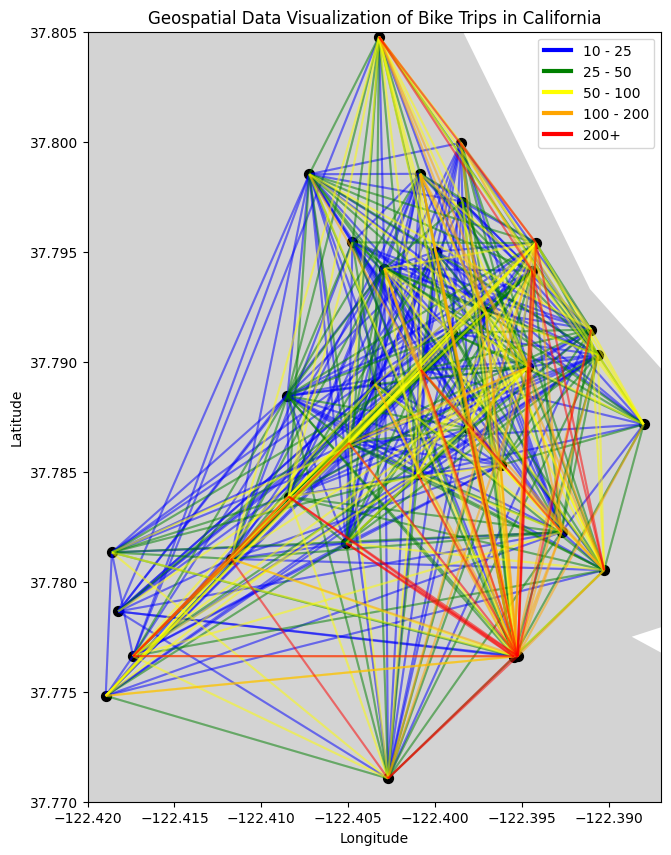

In [ ]:
# Finally, Geospatial Data Visualization

fig, ax = plt.subplots(figsize=(10, 10))

california_map.plot(ax=ax, color="lightgrey")


for i in range(len(data_station)):
  point = Point(data_station.iloc[i]["point"][0], data_station.iloc[i]["point"][1])
  points_df = gpd.GeoDataFrame(geometry=[point], crs="EPSG:4326")
  points_df.plot(ax=ax, color="black", markersize=50, label="Stations")

for i in range(len(df)-1, -1, -1):
  point1 = Point(df.iloc[i]["point_a"][0], df.iloc[i]["point_a"][1])
  point2 = Point(df.iloc[i]["point_b"][0], df.iloc[i]["point_b"][1])

  points_df = gpd.GeoDataFrame(geometry=[point1, point2], crs="EPSG:4326")

  line1 = LineString([point1, point2])
  line2 = LineString([point2, point1])

  line_df = gpd.GeoDataFrame(geometry=[line1, line2], crs="EPSG:4326")
  line_df.plot(ax=ax, color=df.iloc[i]["color"], alpha=0.3)



colors = ["blue", "green", "yellow", "orange", "red"]
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ["10 - 25", "25 - 50", "50 - 100", "100 - 200", "200+"]
plt.legend(lines, labels)

plt.xlim(-122.42, -122.387)
plt.ylim(37.77, 37.805)
plt.title("Geospatial Data Visualization of Bike Trips in California")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [ ]:
# Visualization with folium

mymap = folium.Map(location=[37.788, -122.403], zoom_start=15)

for index, row in df.iterrows():
    point_a = [row["point_a"][1], row["point_a"][0]]
    point_b = [row["point_b"][1], row["point_b"][0]]
    num_trips = row["number_trips"]
    color = row["color"]

    folium.PolyLine([point_a, point_b], color=color, weight=2).add_to(mymap)

mymap